# Exploratory Data Analysis
---

# Load Packages and Data

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
import seaborn as sns

# Other Packages
import datetime # for handling dates
from collections import Counter # count values

# data source: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction
df = pd.read_csv('/home/simon/Predict_House_Prices/kc_house_data.csv')
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Exploratory Data Analysis

### Dimensions of Data

In [2]:
df.shape

(21613, 21)

- The dataset has 21,613 rows and 21 features

### Column Types

In [3]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

- All columns are numeric (except date)

### Count Duplicates

In [4]:
df.duplicated().sum()

0

- No duplicates are included in the file

### Count NA

In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

- No feature contains missing entries

### Summary Statistics

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


- As expected, most features are skewed

### Correlation Heat Map

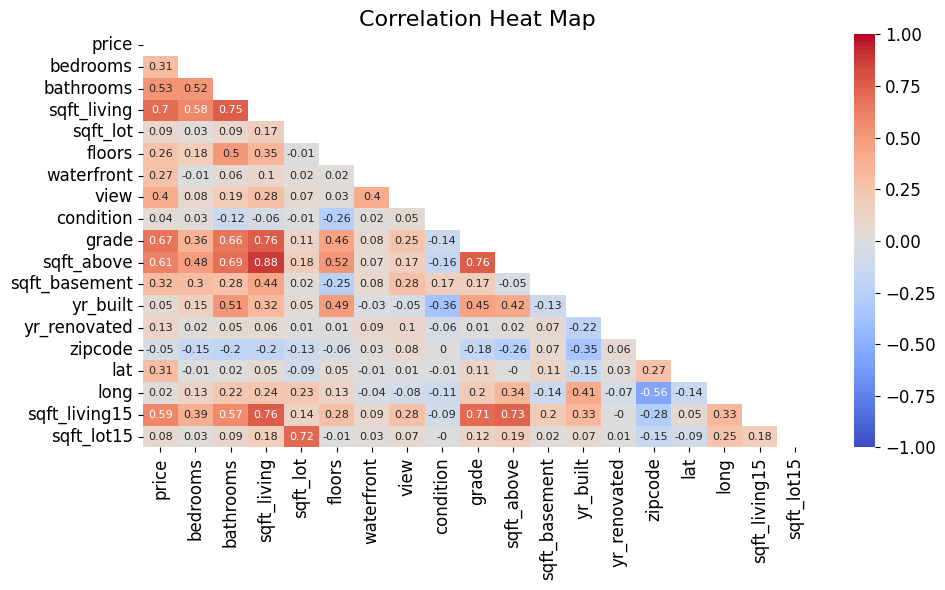

In [20]:
correlations = df.loc[:, ~df.columns.isin(['id','date'])].corr().round(2)

plt.figure(figsize=(10, 6))
plt.title('Correlation Heat Map', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)

mask = np.triu(np.ones_like(correlations, dtype=bool))
ax = sns.heatmap(correlations, cmap='coolwarm', annot=True, annot_kws={'fontsize':8}, vmin=-1, vmax=1, 
    mask=mask)
cax = ax.figure.axes[-1]
cax.tick_params(labelsize=12)

plt.tight_layout()
plt.show()

- Most high positive correlations are unsurprising
- More interesting:
    - Correlation of 0.49 between yr_built and floors suggests differences in houses
    - Sqft of the house has a stronger influence on price than the number of bath- or bedrooms
    - -0.35 correlations of yr_built and zipcode hints toward the city's growth

## Feature Visualization

### Date - Scatter Plot

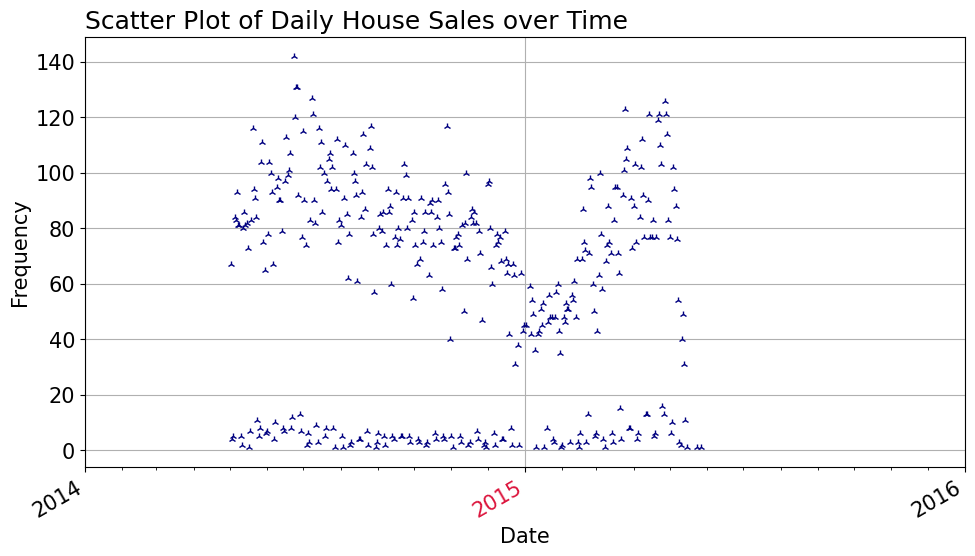

In [16]:
dates = [datetime.datetime.strptime(df['date'][i], '%Y%m%dT%H%M%S') for i in df.index] 

dateFreq = Counter(dates)
dateFreq = pd.DataFrame(dateFreq.most_common(), columns=['Date', 'Frequency']).sort_values(by='Date')

dates = mdates.date2num(dateFreq['Date'])

years = mdates.YearLocator()
months = mdates.MonthLocator()
yearsFmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot_date(dates, dateFreq['Frequency'], fmt='2', markersize=5, color='navy')
plt.rc('font', size=15) 
plt.title('Scatter Plot of Daily House Sales over Time', loc='left')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.tight_layout()

ax.get_xticklabels()[1].set_color('crimson')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
datemin = datetime.date(dateFreq.Date.min().year, 1, 1)
datemax = datetime.date(dateFreq.Date.max().year + 1, 1, 1)
ax.set_xlim(datemin, datemax)
fig.autofmt_xdate()
ax.grid(True)

plt.show()

- Sales seem to be subject to weekly and yearly seasonal effects

### Bedrooms, Price & Living Area - Bar Plot & Histogram

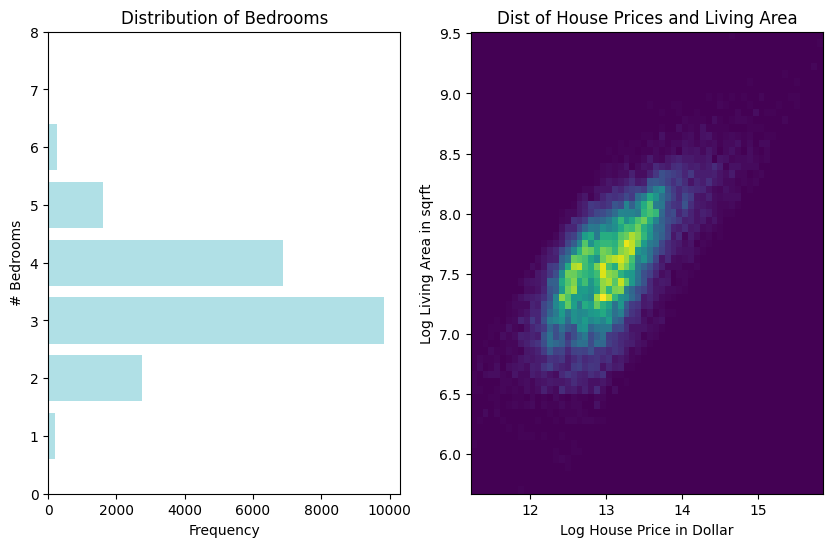

In [11]:
fig = plt.figure(figsize=(10, 6))

bedroom_count = Counter(df['bedrooms'])
bedrooms = pd.DataFrame(bedroom_count.most_common(), columns=['Bedrooms', 'Count']).sort_values(by='Bedrooms', ascending=True)
ax1 = fig.add_subplot(121)
ax1.barh(bedrooms['Bedrooms'], bedrooms['Count'], color='powderblue')
ax1.set_title('Distribution of Bedrooms')
ax1.set_xlabel('Frequency')
ax1.set_ylabel('# Bedrooms')
plt.ylim(0, 8)

ax3 = fig.add_subplot(122)
ax3.hist2d(np.log(df['price']), np.log(df['sqft_living']), bins=60)
ax3.set_title('Dist of House Prices and Living Area')
ax3.set_xlabel('Log House Price in Dollar')
ax3.set_ylabel('Log Living Area in sqrft')

plt.show()

- Distribution of Bedrooms is less skewed than expected 
- Relation between log living area and log prices seems to be quite linear

### Grade & Bathrooms - Bar Plot

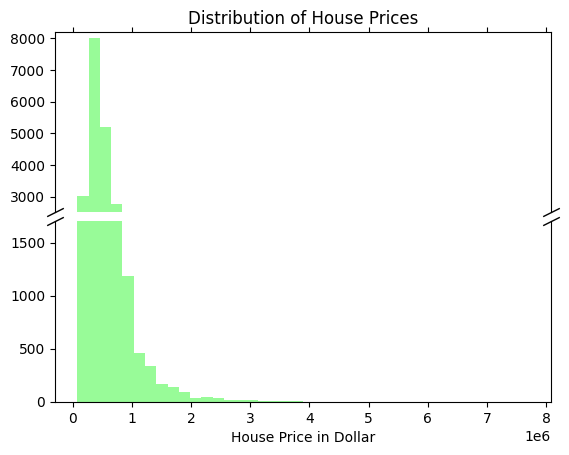

In [33]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.05)

ax1.hist(df['price'], bins=40, color='palegreen')
ax2.hist(df['price'], bins=40, color='palegreen')

ax1.set_ylim(2500, 8200)
ax2.set_ylim(0, 1700)

ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False) 
ax2.xaxis.tick_bottom()

d = .5
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax1.set_title('Distribution of House Prices')
ax2.set_xlabel('House Price in Dollar')
plt.show()

- Vast majority of houses was sold for under 100.000 $

### Bathroom - Line Chart

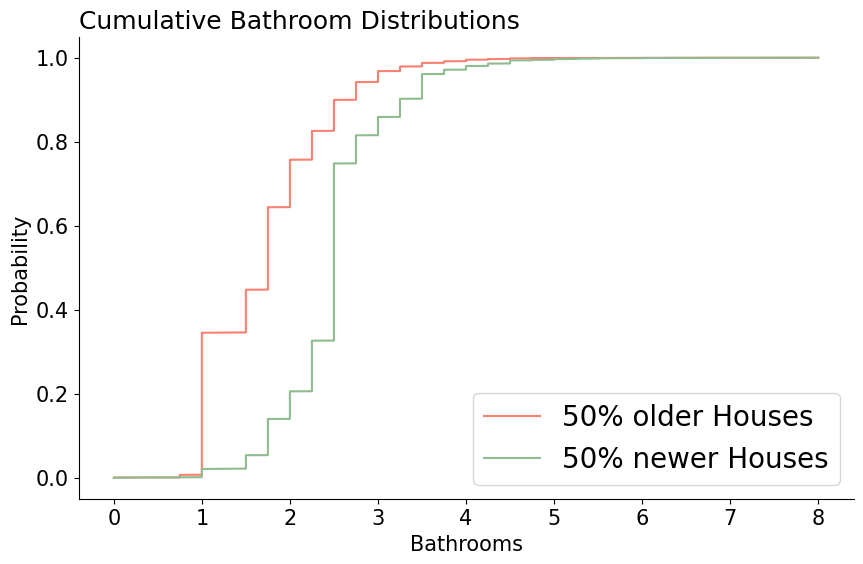

In [23]:
oldHousesSorted = np.sort(df[df['yr_built'] < df['yr_built'].median()]['bathrooms'])
pOld = 1. * np.arange(len(oldHousesSorted)) / (len(oldHousesSorted) - 1)
newHousesSorted = np.sort(df[df['yr_built'] >= df['yr_built'].median()]['bathrooms'])
pNew = 1. * np.arange(len(newHousesSorted)) / (len(newHousesSorted) - 1)

fig, ax = plt.subplots(figsize =(10, 6))
plt.title('Cumulative Bathroom Distributions', loc='left')
plt.xlabel('Bathrooms')
plt.ylabel('Probability')
plt.rc('font', size=20)

ax.plot(oldHousesSorted, pOld, color='salmon')
ax.plot(newHousesSorted, pNew, color='darkseagreen')
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

labels = ['50% older Houses','50% newer Houses']
plt.legend(labels, loc='lower right')
plt.show()

- Newer houses are more likely to have extra bathrooms at any probability

### Year Built & Year Renovated - Boxplot

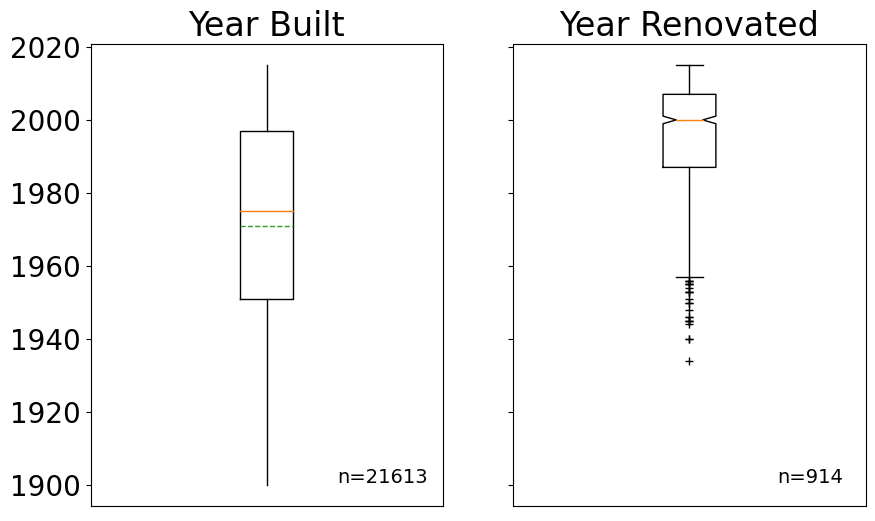

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6), sharey=True)

ax[0].boxplot(df['yr_built'], showcaps=False, meanline=True, showmeans=True)
ax[0].set_title('Year Built')
ax[0].set_xticks([])
ax[0].annotate('n=21613', xy=(0.7,0.05),xycoords='axes fraction', fontsize=14)

renovated = df[df['yr_renovated']>0]
ax[1].boxplot(renovated['yr_renovated'], notch=1, sym='k+')
ax[1].set_title('Year Renovated')
ax[1].set_xticks([])
ax[1].annotate('n=914', xy=(0.75,0.05), xycoords='axes fraction', fontsize=14)
plt.show()

- Only 5% of houses were renovated

# Next:
- Geographical Data
- 3d Plot